In [80]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [88]:
#заполняю пропуски
df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0], inplace = True)
df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0], inplace = True)

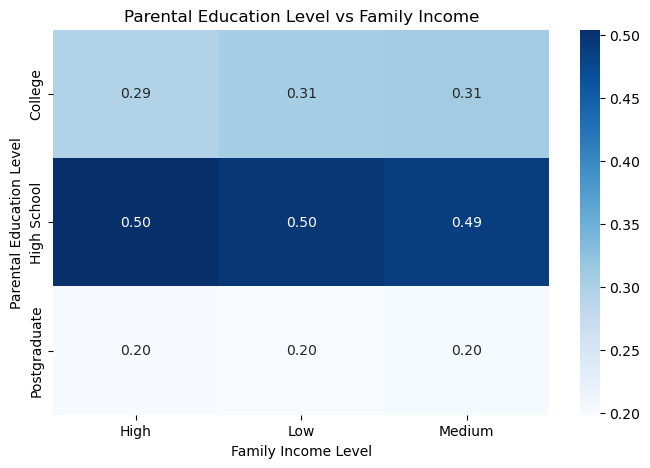

In [90]:
# Создаём pivot таблицу
pivot = pd.crosstab(df["Parental_Education_Level"], df["Family_Income"], normalize="columns")

# Визуализируем с помощью тепловой карты
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap="Blues", fmt=".2f")
plt.title("Parental Education Level vs Family Income")
plt.xlabel("Family Income Level")
plt.ylabel("Parental Education Level")
plt.show()

In [96]:
df["Parental_Education_Level"].fillna(df["Parental_Education_Level"].mode()[0], inplace = True)

In [98]:
#переменная динамики результата
df["Performance_Change"] = df["Exam_Score"] - df["Previous_Scores"]

In [102]:
#функция, переводящая категориальные переменные [Low, Medium, High] в [0, 1, 2]
def encode_categorical(df, columns):
    
    cdict = {'Low': 0, 'Medium': 1, 'High': 2}
    
    for col in columns:
        df[col] = df[col].map(cdict)
    
    return df

In [104]:
#массив с категориальными переменными
cat_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", 
                    "Family_Income", "Teacher_Quality"]

In [106]:
df = encode_categorical(df, cat_cols)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Performance_Change
0,23,84,0,2,No,7,73,0,Yes,0,...,1,Public,Positive,3,No,High School,Near,Male,67,-6
1,19,64,0,1,No,8,59,0,Yes,2,...,1,Public,Negative,4,No,College,Moderate,Female,61,2
2,24,98,1,1,Yes,7,91,1,Yes,2,...,1,Public,Neutral,4,No,Postgraduate,Near,Male,74,-17
3,29,89,0,1,Yes,8,98,1,Yes,1,...,1,Public,Negative,4,No,High School,Moderate,Male,71,-27
4,19,92,1,1,Yes,6,65,1,Yes,3,...,2,Public,Neutral,4,No,College,Near,Female,70,5


In [100]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Parental_Involvement: ['Low' 'Medium' 'High']
Access_to_Resources: ['High' 'Medium' 'Low']
Motivation_Level: ['Low' 'Medium' 'High']
Family_Income: ['Low' 'Medium' 'High']
Teacher_Quality: ['Medium' 'High' 'Low']
